In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time_series2d as ts
from importlib import reload
from copy import copy

def reimport():
    import time_series2d
    reload(time_series2d)
    import time_series2d as ts
    
def get_krhoA(a, b, c, R, T):
    """Convert fitting parameters to physical parameters"""
    eta = ts.get_eta(T)
    d2 = b + 2 * np.sqrt(a*c) 
    k = 12 * np.pi**2 * eta * R * np.sqrt(a/d2) 
    rho = 9 * eta / (4*np.pi*R**2) * np.sqrt(c/d2) 
    Ainv2 = 6*np.pi**3*eta*R / (ts.kB*T * d2) 
    A = np.sqrt(Ainv2) 
    return k, rho, A

def get_T(a, b, c, vvar, T0):
    d2 = b + 2 * np.sqrt(a*c) 
    return T0 * vvar * np.sqrt(c*d2) / (2*np.pi**3)

reimport()

In [15]:
reimport()
ts.find_ders(r"/mnt/ext/data")

['/mnt/ext/data/20201103', '/mnt/ext/data/20201111', '/mnt/ext/data/20201130']

In [19]:
der = r"/mnt/ext/data/20201130"
ders = ts.find_ders(der)

In [20]:
ders

['/mnt/ext/data/20201130/bead1',
 '/mnt/ext/data/20201130/cool',
 '/mnt/ext/data/20201130/I-A0.2',
 '/mnt/ext/data/20201130/I-A0.4']

In [21]:
fs = ts.find_files(ders[0])

In [25]:
D = ts.TimeSeries(fs[0])
D.params

{'t': 1002.0,
 'r-Sps': 10000000.0,
 'Tair-C': 24.8,
 'Theater-C': 25.4,
 'D-um': 3.17,
 'PDF-mW': 92.24,
 'PDB-mW': 81.49,
 'Det-V': 33.27,
 'notes': ['bead1'],
 'date': '20201130'}

(4.246674162064208e-05, 359.72682356759196, 4871155.4665122675)


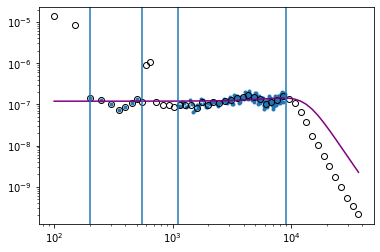

In [30]:
D = ts.TimeSeries(fs[10])
D.bin_average("x", Npts=128, inplace=True)
D.bin_average("y", Npts=128, inplace=True)

#vfreq, vpsd = D.PSD("vx", tmax=84e-3)
#plt.loglog(vfreq, vpsd)
fmin1=200
fmin2=550
fmax1=9.0e3
fmax2=1100

coord="x"
freq, psd = D.PSD(coord, tmax=20e-3)
mask = np.logical_and(np.logical_not(np.logical_and(freq<fmax2, freq>fmin2)), 
                      np.logical_and(freq>fmin1, freq<fmax1))

abc = D.get_abc(coord, mask=mask, optimize=False)
krhoA = get_krhoA(*abc, R=D.R, T=D.T)
print(krhoA)


plt.loglog(freq[mask], psd[mask], ls="none", marker=".", ms=6)
logfreq, logpsd = D.logbin_average(f"{coord}_psd", Npts=30)
plt.loglog(logfreq, logpsd, marker="o", mfc="none", mec="k", ls="none")
plt.loglog(logfreq, 
           ts.fitting_funcs["psd_abc"](logfreq, *abc), c="purple")
plt.axvline(fmin1)
plt.axvline(fmax1)
plt.axvline(fmin2)
plt.axvline(fmax2)



In [29]:
fmax = 1e4
fmin = 3.5e3
Ts_all = []
Ts_com_all = []
times_all = []
abcs_all = []
vvars_all = []

T0=297.883

for der in ders[:1]:
    Ts = []
    Ts_com = []
    times = []
    vvars = []
    abcs = []
    fnames = ts.find_files(der)
    for fname in fnames[:]:
        reimport()
        D = ts.TimeSeries(fname)
        Ts.append(D.)
        for coord in ("x"):
            D.bin_average(coord, Npts=32, inplace=True)
            D.firstdiff(coord)
            _, v = D.get_tx(f"v{coord}")
            times += [D.params["t"]]
            freq, psd = D.PSD(coord, tmax=20.4e-3)
            mask = np.logical_and(np.logical_not(np.logical_and(freq<fmax2, freq>fmin2)), 
                      np.logical_and(freq>fmin1, freq<fmax1))
            
            abc = D.get_abc(coord, mask=mask, optimize=False)
            abcs.append(abc)
            krhoA = get_krhoA(*abc, R=D.R, T=T0)
            krhoAs.append(krhoA)
            vvar = np.var(v)
            vvars.append(vvar)
            T = get_T(*abc, vvar=vvar, T0=T0)
            Ts_com.append(T)
            logfreq, logpsd = D.logbin_average(f"{coord}_psd", Npts=30)
            plt.loglog(logfreq, logpsd, marker="o", mfc="none", mec="k", ls="none")
            plt.loglog(logfreq, 
                       ts.fitting_funcs["psd_abc"](logfreq, *abc), c="purple")

            print((T-273.15))
        plt.show()
    Ts = np.array(Ts)
    Ts_com = np.array(Ts_com)
    abcs = np.array(abcs)
    vvars = np.array(vvars)
    times = np.array(times)
    times -= times[0]
    Ts_all.append(Ts)
    Ts_com_all.append(Ts_com)
    abcs_all.append(abcs)
    vvars_all.append(vvars)
    times_all.append(times)

Ts_all = Ts_all
Ts_com_all = np.array(Ts_com_all)



AttributeError: 'TimeSeries' object has no attribute 'Tair'

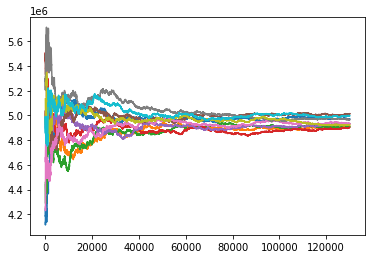

In [31]:
for der in ders[:1]:
    fnames = ts.find_files(der)
    for fname in fnames[:10]:
        reimport()
        D = ts.TimeSeries(fname)
        for coord in ("x"):
            D.bin_average(coord, Npts=64, inplace=True)
            D.firstdiff(coord)
            cumvvars = [np.var(D.vx[:i]) for i in range(1000,D.vx.size)]
            plt.plot(cumvvars)
            freq, psd = D.PSD(coord, tmax=83.4e-3)
    plt.show()

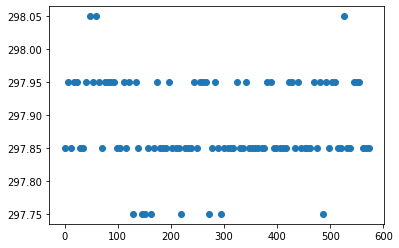

In [174]:
for i in range(len(ders[:1])):
    times = copy(times_all[i])
    Ts = Ts_all[i]
    Ts_com = Ts_com_all[i]
    if i>0:
        times += times_all[i-1][-1]  
    plt.plot(times, Ts, ls="none", marker="o")
    #plt.plot(times, Ts_com, ls="none", marker="s")

In [708]:
ks, rhos, As = krhoAs.T
for m in (ks, rhos, As):
    print(np.std(m) / np.mean(m))

0.017602781644662287
0.016332894580160406
0.008192268414379538


In [712]:
for der in ders[:1]:
    vvars = []
    for fname in fnames[:]:
        reimport()
        D = ts.TimeSeries(fname)
        for coord in ("x"):
            D.bin_average(coord, Npts=32, inplace=True)
            D.firstdiff(coord)
            _, v = D.get_tx(f"v{coord}")
            vvar = np.var(v)
            freq, psd = D.PSD(coord, tmax=20e-3)
            abc = D.get_abc(coord, fmin=fmin, fmax=fmax, optimize=False)
            vvars.append(vvar)
            T = get_T(*abc, T0=D.T, vvar=vvar)
            print(T, vvar, abc)

270.87638141920235 256270.1 [ 7.32922301e+07 -3.54152660e+00  6.35543658e-08]
272.8686939984184 260237.94 [ 7.59248038e+07 -3.71733572e+00  6.54497875e-08]
274.7121850260886 258792.61 [ 7.81843304e+07 -3.87783901e+00  6.79290504e-08]
272.6077097349763 260558.62 [ 7.44944990e+07 -3.65042133e+00  6.48201300e-08]
275.30704288918264 257099.44 [ 7.76485750e+07 -3.81754839e+00  6.72151382e-08]
272.34082723603046 258440.4 [ 7.30629157e+07 -3.56675592e+00  6.41384004e-08]
274.71718879826403 256775.25 [ 7.61452529e+07 -3.77711577e+00  6.72864600e-08]
274.60901573631594 258905.67 [ 7.57042219e+07 -3.73441125e+00  6.63383941e-08]
273.1585338808098 259264.6 [ 7.62704994e+07 -3.73747083e+00  6.58050654e-08]
273.7939977442851 259581.39 [ 7.66151424e+07 -3.78426894e+00  6.66643403e-08]
271.83616745905795 260137.28 [ 7.68009736e+07 -3.73661369e+00  6.51886755e-08]
272.5872644471528 258172.67 [ 7.53588212e+07 -3.63741384e+00  6.42822998e-08]
275.6910454936384 262298.16 [ 7.65595912e+07 -3.79087101e+00 

KeyboardInterrupt: 

In [720]:
np.std(Ts_com+273.15)/np.mean(Ts_com+273.15)

0.007277027464179554

In [721]:
np.std(Ts+273.15)/np.mean(Ts+273.15)

0.0001744855293060798

[4.46297219e-06 5.63484865e-06 1.16984163e+03 8.06553213e-07
 3.18802147e-07]
[4.77077987e-06 5.85585608e-06 1.45852729e+03 7.94561236e-07
 3.05671442e-07]
[4.15183030e-06 5.87016861e-06 1.24269979e+03 8.22155830e-07
 3.19078453e-07]
[5.17609998e-06 5.49800277e-06 1.27869174e+03 7.73845276e-07
 3.13399447e-07]
[4.80064590e-06 5.55340596e-06 1.32053193e+03 8.06835353e-07
 3.11641543e-07]
[4.12367699e-06 5.80244923e-06 1.37659172e+03 8.41155768e-07
 3.01118273e-07]
[4.45923811e-06 5.26650836e-06 1.33489482e+03 8.33823808e-07
 3.05733035e-07]
[4.27482622e-06 6.20571203e-06 1.59704207e+03 8.46419534e-07
 2.92339474e-07]
[4.59251699e-06 5.55073677e-06 1.22518681e+03 8.26916853e-07
 3.20283195e-07]
[4.25946968e-06 5.92482812e-06 1.35081539e+03 8.54972668e-07
 3.01835550e-07]
[4.52155181e-06 5.45875328e-06 1.24205312e+03 8.73752725e-07
 3.01757978e-07]
[4.61828652e-06 6.16875508e-06 1.50913089e+03 8.57665614e-07
 2.94585241e-07]
[4.56862830e-06 5.07690193e-06 1.17742676e+03 8.60888194e-07
 3.

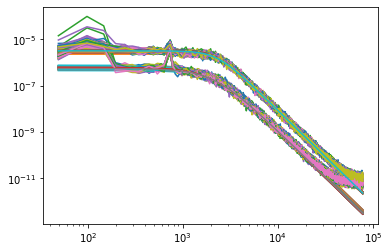

In [248]:
reimport()
der = r"/mnt/ext/data/20201111"
ders = ts.find_ders(der)
fnames = ts.find_files(ders[3])

popts = []
perrs = []
for fname in fnames:
    D = ts.TimeSeries(fname)
    D.bin_average("x", Npts=64, inplace=True)
    D.bin_average("y", Npts=64, inplace=True)
    freq, x_psd = D.PSD("x",tmax=20.4e-3)
    freq, y_psd = D.PSD("y",tmax=20.4e-3)


    mask = np.logical_and(np.logical_not(np.logical_and(freq<fmax2, freq>fmin2)), 
                          np.logical_and(freq>fmin1, freq<fmax1))

    plt.loglog(freq, x_psd)
    plt.loglog(freq, ts.psd_abc_func(freq, *D.get_abc("x", mask=mask)))
    plt.loglog(freq, y_psd)
    plt.loglog(freq, ts.psd_abc_func(freq, *D.get_abc("y", mask=mask)))


    popt, pcov = D.calibrate(mask=mask)
    perrs.append(np.sqrt(np.diag(pcov)))
    popts.append(popt)
    print(popt)

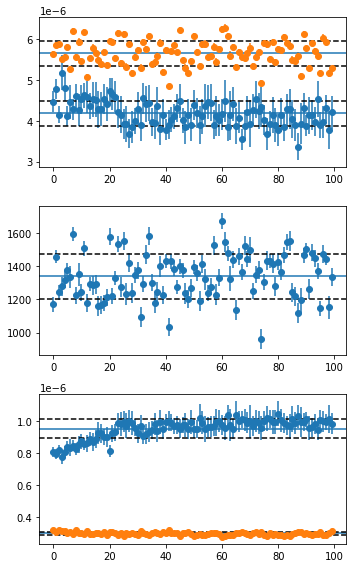

In [249]:
popts = np.array(popts)
perrs = np.array(perrs)

fig, axs = plt.subplots(3, 1, figsize=(5,8))
for labeli, label in enumerate(("k", "rho", "A")):
    if label == "k":
        slc = slice(0,2)
    elif label == "rho":
        slc = [2]
    else:
        slc = slice(3,5)
    for vals, dvals in zip(popts[:, slc].T, perrs[:,slc].T):
        axs[labeli].errorbar(range(len(vals)), vals, yerr=dvals, ls="none", marker="o")
        axs[labeli].axhline(np.mean(vals))
        axs[labeli].axhline(np.mean(vals)+np.std(vals), c="k", ls="--")
        axs[labeli].axhline(np.mean(vals)-np.std(vals), c="k", ls="--")
plt.tight_layout()
plt.show()

In [250]:
np.mean(popts[0,2])

1169.8416319250166